In [115]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from src.model import ConditionalUNet
from src.dataset import PolygonDataset


In [116]:
def load_model(model_path, num_colors):
    model = ConditionalUNet(n_channels=3, n_classes=3, num_colors=num_colors)
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
    model.eval()
    return model


In [117]:
def predict(model, image_path, color_name, color_to_idx, transform):
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0)
    color_idx = torch.tensor([color_to_idx[color_name]])
    
    with torch.no_grad():
        output = model(image_tensor, color_idx)
        
    output_image = transforms.ToPILImage()(output.squeeze(0))
    return image, output_image


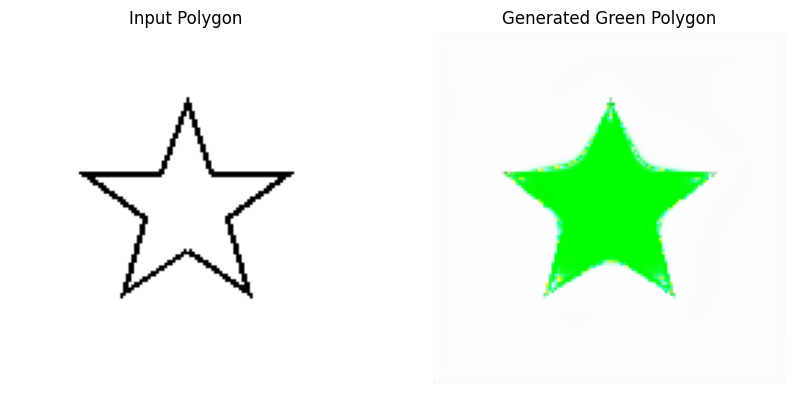

In [128]:
# --- Parameters ---
MODEL_PATH = 'polygon_unet.pth'
IMAGE_PATH = 'dataset/training/inputs/star.png'
COLOR_NAME = 'green'  # Try 'yellow', 'blue', 'cyan'
IMAGE_SIZE = 128

# --- Load color mapping ---
train_dataset = PolygonDataset(root_dir='dataset/training')
color_to_idx = train_dataset.color_to_idx
num_colors = len(train_dataset.colors)
# --- Load Model ---
model = load_model(MODEL_PATH, num_colors)

# --- Transform ---
transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
])

# --- Predict ---
input_image, output_image = predict(model, IMAGE_PATH, COLOR_NAME, color_to_idx, transform)

# --- Visualize ---
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(input_image)
ax[0].set_title('Input Polygon')
ax[0].axis('off')

ax[1].imshow(output_image)
ax[1].set_title(f'Generated {COLOR_NAME.capitalize()} Polygon')
ax[1].axis('off')

plt.show()
